# Proyecto EDA - Banking Marketing Campaign
## Análisis Exploratorio de Datos

# 1. Importación de Librerías

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carga de Datos

### 2.1 Cargar datos bancarios

In [97]:
bank_data = pd.read_csv('E:/marc_project/project_4/bank-additional.csv')

In [98]:
bank_data.shape

(43000, 24)

In [99]:
bank_data.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,...,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,...,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,...,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,...,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,...,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


### 2.2 Cargar datos de clientes

In [100]:
customer_2012 = pd.read_excel('E:/marc_project/project_4/customer-details.xlsx', sheet_name='2012')
customer_2013 = pd.read_excel('E:/marc_project/project_4/customer-details.xlsx', sheet_name='2013')
customer_2014 = pd.read_excel('E:/marc_project/project_4/customer-details.xlsx', sheet_name='2014')

In [101]:
customer_data = pd.concat([customer_2012, customer_2013, customer_2014], ignore_index=True)

In [102]:
customer_data.shape

(43170, 7)

In [103]:
customer_data.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


# 3. Pre-procesamiento y Limpieza de Datos

**Objetivos:**
- Detectar y corregir errores
- Manejar valores faltantes
- Estandarizar tipos de datos y formatos

### 3.1 Inspección inicial de valores faltantes

In [104]:
bank_data.isnull().sum()

Unnamed: 0           0
age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

In [105]:
customer_data.isnull().sum()

Unnamed: 0           0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64

### 3.2 Eliminar columnas innecesarias

In [106]:
bank_data = bank_data.drop('Unnamed: 0', axis=1)
customer_data = customer_data.drop('Unnamed: 0', axis=1)

### 3.3 Renombrar columnas para consistencia

In [107]:
bank_data = bank_data.rename(columns={'id_': 'ID'})

In [108]:
bank_data.columns = bank_data.columns.str.replace('.', '_', regex=False)

In [109]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'y', 'date', 'latitude', 'longitude', 'ID'],
      dtype='object')

### 3.4 Limpiar columnas de texto
**Por qué:** Eliminar puntos y estandarizar mayúsculas para análisis consistente

In [110]:
bank_data['job'] = bank_data['job'].str.replace('.', '', regex=False).str.upper().str.strip()

In [111]:
bank_data['education'] = bank_data['education'].str.replace('.', '', regex=False).str.upper().str.strip()

In [112]:
text_columns = ['marital', 'contact', 'poutcome', 'y']
for col in text_columns:
    bank_data[col] = bank_data[col].str.upper().str.strip()

### 3.5 Convertir columnas numéricas con formato incorrecto
**Por qué:** Columnas económicas usan coma como separador decimal

In [113]:
numeric_cols = ['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m']
for col in numeric_cols:
    bank_data[col] = bank_data[col].astype(str).str.replace(',', '.').astype(float)

In [114]:
bank_data[numeric_cols].dtypes

emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
dtype: object

### 3.6 Convertir fechas en español a datetime
**Por qué:** Las fechas están en formato DD-mes_español-YYYY

In [115]:
month_dict = {
    'enero': '01', 'febrero': '02', 'marzo': '03', 'abril': '04',
    'mayo': '05', 'junio': '06', 'julio': '07', 'agosto': '08',
    'septiembre': '09', 'octubre': '10', 'noviembre': '11', 'diciembre': '12'
}

In [116]:
bank_data['date'] = bank_data['date'].replace(month_dict, regex=True)
bank_data['date'] = pd.to_datetime(bank_data['date'], format='%d-%m-%Y', errors='coerce')

In [117]:
customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'], errors='coerce')

In [118]:
bank_data['date'].dtype

dtype('<M8[ns]')

### 3.7 Imputar valores faltantes en age
**Por qué:** 11.91% de valores faltantes, usar mediana para robustez contra outliers

In [119]:
bank_data['age'].fillna(bank_data['age'].median(), inplace=True)

In [120]:
bank_data['age'].isnull().sum()

np.int64(0)

### 3.8 Verificar duplicados

In [121]:
bank_data.duplicated().sum()

np.int64(0)

In [122]:
bank_data['ID'].duplicated().sum()

np.int64(0)

In [123]:
customer_data['ID'].duplicated().sum()

np.int64(0)

### 3.9 Crear nuevas columnas temporales
**Por qué:** Facilitar análisis de patrones temporales

In [124]:
bank_data['year'] = bank_data['date'].dt.year
bank_data['month'] = bank_data['date'].dt.month
bank_data['day_of_week'] = bank_data['date'].dt.dayofweek

### 3.10 Crear columna de composición familiar
**Por qué:** Combinar niños y adolescentes para entender tamaño familiar

In [125]:
customer_data['total_children'] = customer_data['Kidhome'] + customer_data['Teenhome']

# 4. Fusión de Datasets

### 4.1 Análisis de IDs antes de fusionar

In [126]:
print(f"IDs únicos en bank_data: {bank_data['ID'].nunique()}")
print(f"IDs únicos en customer_data: {customer_data['ID'].nunique()}")

IDs únicos en bank_data: 43000
IDs únicos en customer_data: 43170


In [127]:
common_ids = set(bank_data['ID']).intersection(set(customer_data['ID']))
print(f"IDs en común: {len(common_ids)}")

IDs en común: 43000


### 4.2 Fusionar datasets

In [128]:
data = bank_data.merge(customer_data, on='ID', how='left')

In [129]:
data.shape

(43000, 32)

In [130]:
data.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,ID,year,month,day_of_week,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,total_children
0,38.0,HOUSEMAID,MARRIED,BASIC4Y,0.0,0.0,0.0,TELEPHONE,261,1,...,089b39d8-e4d0-461b-87d4-814d71e0e079,2019.0,8.0,4.0,161770,1,0,2012-04-04,29,1
1,57.0,SERVICES,MARRIED,HIGHSCHOOL,NaN,0.0,0.0,TELEPHONE,149,1,...,e9d37224-cb6f-4942-98d7-46672963d097,2016.0,9.0,2.0,85477,1,1,2012-12-30,7,2
2,37.0,SERVICES,MARRIED,HIGHSCHOOL,0.0,1.0,0.0,TELEPHONE,226,1,...,3f9f49b5-e410-4948-bf6e-f9244f04918b,2019.0,2.0,4.0,147233,1,1,2012-02-02,5,2
3,40.0,ADMIN,MARRIED,BASIC6Y,0.0,0.0,0.0,TELEPHONE,151,1,...,9991fafb-4447-451a-8be2-b0df6098d13e,2015.0,11.0,6.0,121393,1,2,2012-12-21,29,3
4,56.0,SERVICES,MARRIED,HIGHSCHOOL,0.0,0.0,1.0,TELEPHONE,307,1,...,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,2017.0,1.0,6.0,63164,1,2,2012-06-20,20,3


# 5. Análisis Exploratorio de Datos (EDA)

**Objetivos:**
- Entender distribuciones de variables
- Identificar relaciones entre variables
- Detectar patrones y outliers

### 5.1 Información general del dataset

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                43000 non-null  float64       
 1   job                42655 non-null  object        
 2   marital            42915 non-null  object        
 3   education          41193 non-null  object        
 4   default            34019 non-null  float64       
 5   housing            41974 non-null  float64       
 6   loan               41974 non-null  float64       
 7   contact            43000 non-null  object        
 8   duration           43000 non-null  int64         
 9   campaign           43000 non-null  int64         
 10  pdays              43000 non-null  int64         
 11  previous           43000 non-null  int64         
 12  poutcome           43000 non-null  object        
 13  emp_var_rate       43000 non-null  float64       
 14  cons_p

In [132]:
data.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,...,longitude,year,month,day_of_week,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,total_children
count,43000.000000,34019.000000,41974.000000,41974.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,42529.000000,...,43000.000000,42752.000000,42752.000000,42752.000000,43000.000000,43000.000000,43000.000000,43000,43000.000000,43000.000000
mean,39.741698,0.000088,0.535998,0.155620,257.739279,2.567233,962.330953,0.174023,0.077128,93.574219,...,-95.939067,2017.001310,6.502058,3.018830,93241.200070,1.004791,0.998605,2013-05-12 07:05:06.083720960,16.589698,2.003395
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,...,-124.997000,2015.000000,1.000000,0.000000,5841.000000,0.000000,0.000000,2012-01-01 00:00:00,1.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,...,-110.494250,2016.000000,4.000000,1.000000,49610.000000,0.000000,0.000000,2012-07-16 00:00:00,9.000000,1.000000
50%,38.000000,0.000000,1.000000,0.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,...,-95.899500,2017.000000,7.000000,3.000000,93050.500000,1.000000,1.000000,2013-03-02 00:00:00,17.000000,2.000000
75%,46.000000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,...,-81.427750,2018.000000,10.000000,5.000000,136744.500000,2.000000,2.000000,2014-03-29 00:00:00,25.000000,3.000000
max,98.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,...,-66.937000,2019.000000,12.000000,6.000000,180802.000000,2.000000,2.000000,2014-12-31 00:00:00,32.000000,4.000000
std,9.817735,0.009390,0.498708,0.362499,258.666033,2.772294,187.260394,0.497366,1.573898,0.579548,...,16.752282,1.414312,3.448718,1.997331,50498.316182,0.815913,0.815983,NaN,9.239205,1.153144


### 5.2 Variable objetivo (y)
**Por qué:** Entender el balance de clases para suscripción

In [133]:
data['y'].value_counts()

y
NO     38156
YES     4844
Name: count, dtype: int64

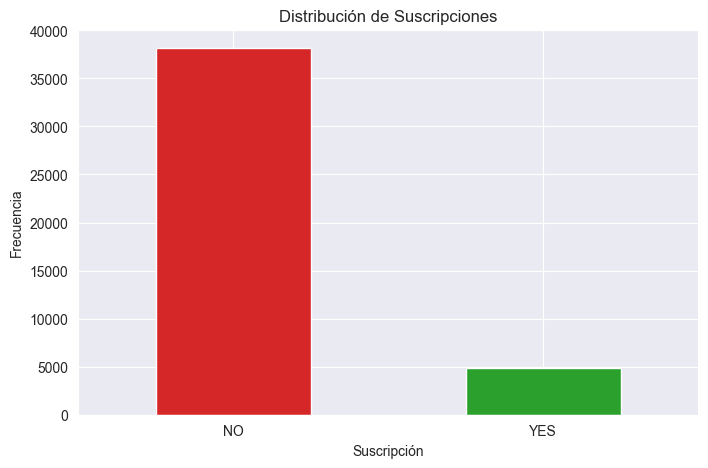

In [134]:
plt.figure(figsize=(8, 5))
data['y'].value_counts().plot(kind='bar', color=['#d62728', '#2ca02c'])
plt.title('Distribución de Suscripciones')
plt.xlabel('Suscripción')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

In [135]:
subscription_rate = (data['y'] == 'YES').sum() / len(data) * 100
print(f"Tasa de suscripción: {subscription_rate:.2f}%")

Tasa de suscripción: 11.27%


### 5.3 Variables demográficas

#### 5.3.1 Edad

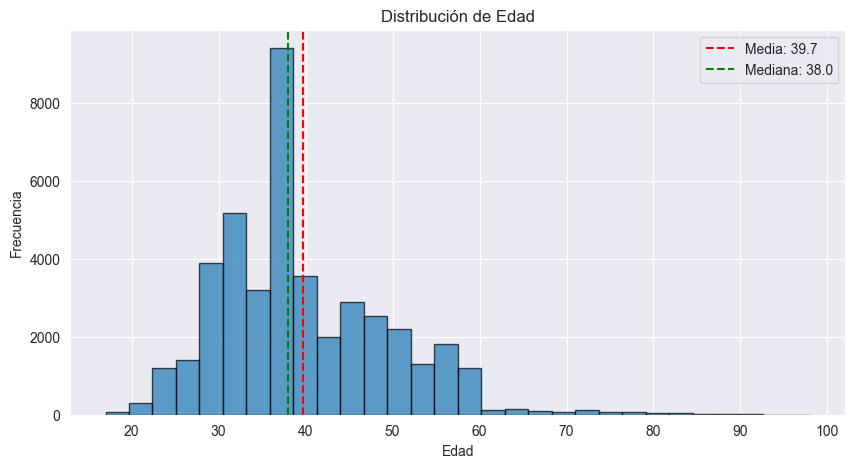

In [136]:
plt.figure(figsize=(10, 5))
plt.hist(data['age'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(data['age'].mean(), color='red', linestyle='--', label=f'Media: {data["age"].mean():.1f}')
plt.axvline(data['age'].median(), color='green', linestyle='--', label=f'Mediana: {data["age"].median():.1f}')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

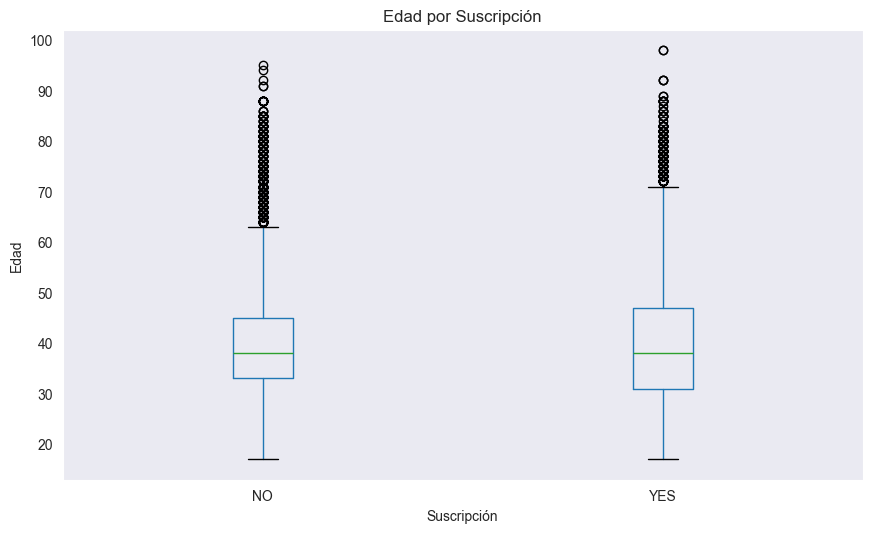

In [137]:
plt.figure(figsize=(10, 5))
data.boxplot(column='age', by='y', grid=False)
plt.title('Edad por Suscripción')
plt.suptitle('')
plt.xlabel('Suscripción')
plt.ylabel('Edad')
plt.show()

#### 5.3.2 Trabajo

In [138]:
data['job'].value_counts()

job
ADMIN            10873
BLUE-COLLAR       9654
TECHNICIAN        7026
SERVICES          4162
MANAGEMENT        3050
RETIRED           1790
ENTREPRENEUR      1522
SELF-EMPLOYED     1489
HOUSEMAID         1123
UNEMPLOYED        1063
STUDENT            903
Name: count, dtype: int64

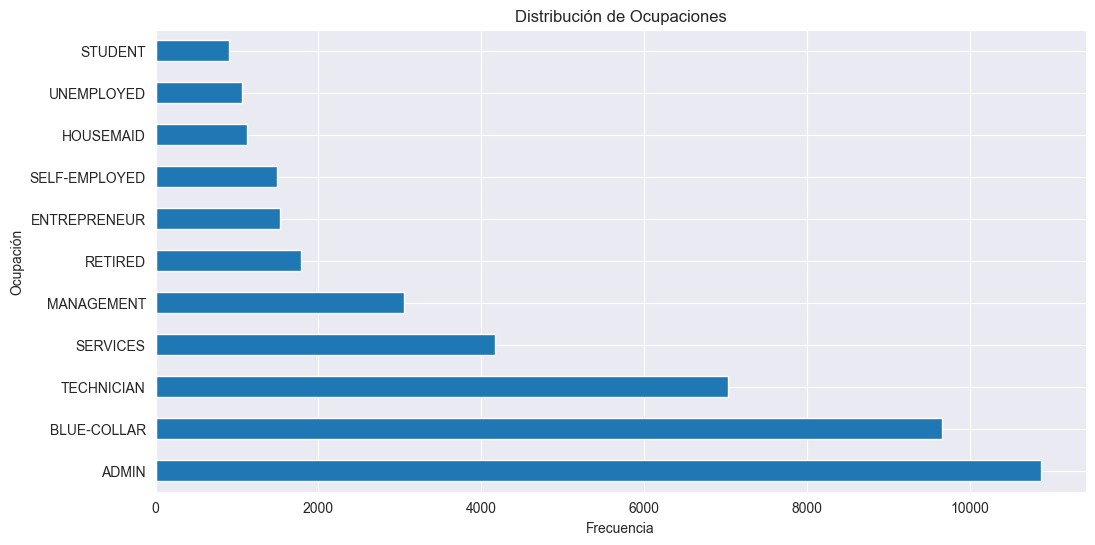

In [139]:
plt.figure(figsize=(12, 6))
data['job'].value_counts().plot(kind='barh')
plt.title('Distribución de Ocupaciones')
plt.xlabel('Frecuencia')
plt.ylabel('Ocupación')
plt.show()

In [140]:
job_subscription = pd.crosstab(data['job'], data['y'], normalize='index') * 100
job_subscription

y,NO,YES
job,,
ADMIN,86.986112,13.013888
BLUE-COLLAR,93.111664,6.888336
ENTREPRENEUR,91.721419,8.278581
HOUSEMAID,90.115761,9.884239
MANAGEMENT,88.786885,11.213115
RETIRED,74.804469,25.195531
SELF-EMPLOYED,89.187374,10.812626
SERVICES,91.926958,8.073042
STUDENT,68.660022,31.339978


<Figure size 1200x600 with 0 Axes>

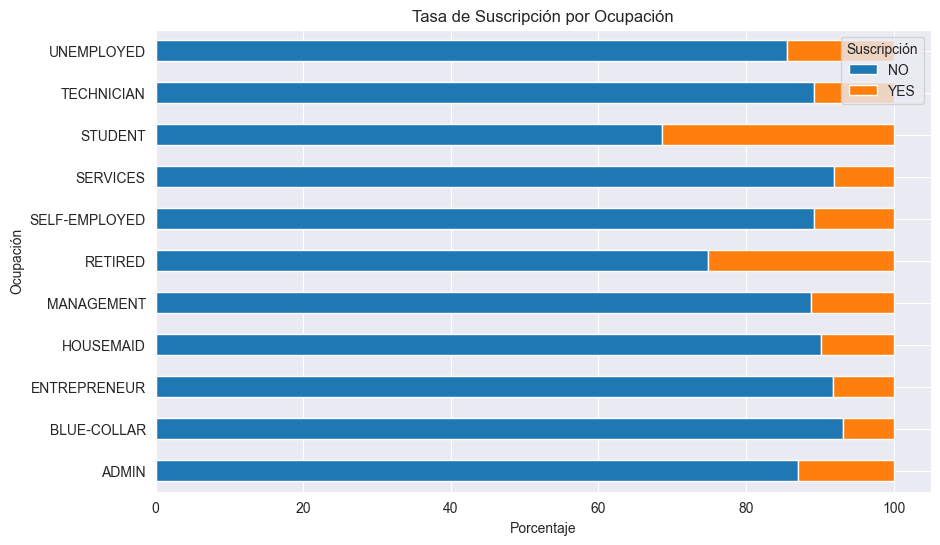

In [141]:
plt.figure(figsize=(12, 6))
job_subscription.plot(kind='barh', stacked=True)
plt.title('Tasa de Suscripción por Ocupación')
plt.xlabel('Porcentaje')
plt.ylabel('Ocupación')
plt.legend(title='Suscripción')
plt.show()

#### 5.3.3 Estado civil

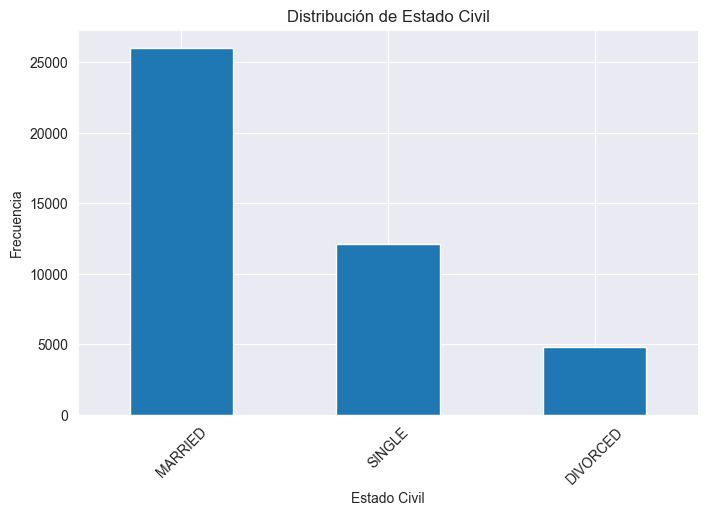

In [142]:
plt.figure(figsize=(8, 5))
data['marital'].value_counts().plot(kind='bar')
plt.title('Distribución de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

#### 5.3.4 Educación

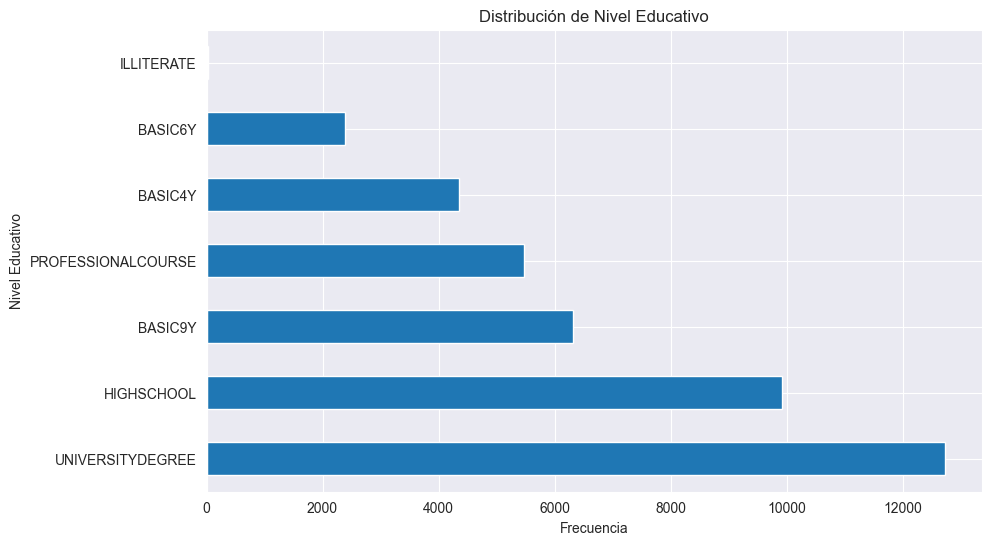

In [143]:
plt.figure(figsize=(10, 6))
data['education'].value_counts().plot(kind='barh')
plt.title('Distribución de Nivel Educativo')
plt.xlabel('Frecuencia')
plt.ylabel('Nivel Educativo')
plt.show()

### 5.4 Variables financieras

#### 5.4.1 Ingreso

In [144]:
data['Income'].describe()

count     43000.000000
mean      93241.200070
std       50498.316182
min        5841.000000
25%       49610.000000
50%       93050.500000
75%      136744.500000
max      180802.000000
Name: Income, dtype: float64

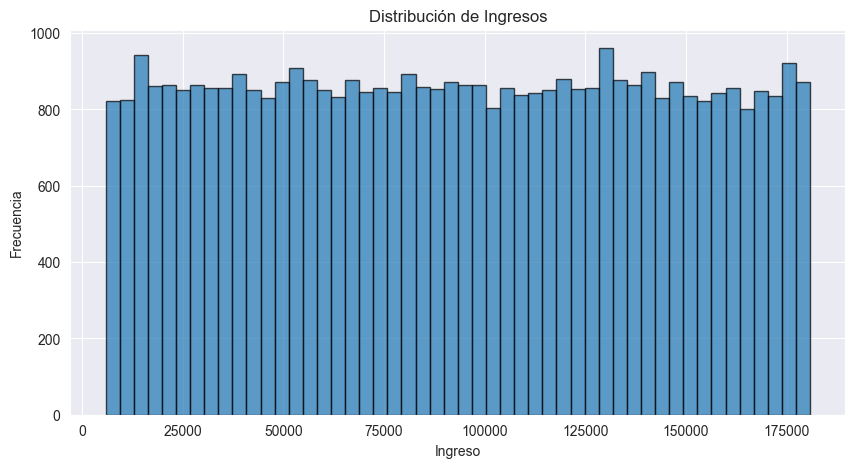

In [145]:
plt.figure(figsize=(10, 5))
plt.hist(data['Income'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.show()

<Figure size 1000x500 with 0 Axes>

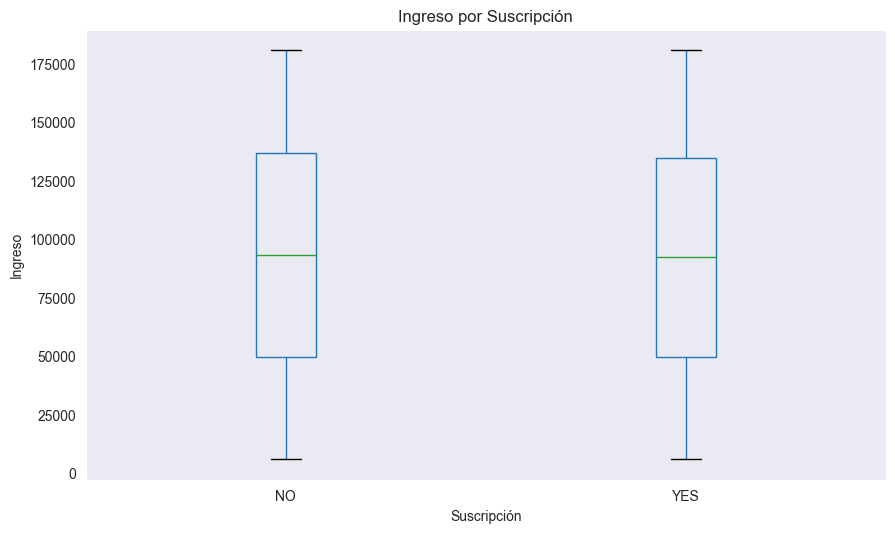

In [146]:
plt.figure(figsize=(10, 5))
data.boxplot(column='Income', by='y', grid=False)
plt.title('Ingreso por Suscripción')
plt.suptitle('')
plt.xlabel('Suscripción')
plt.ylabel('Ingreso')
plt.show()

#### 5.4.2 Préstamos

In [147]:
loan_cols = ['default', 'housing', 'loan']
for col in loan_cols:
    print(f"{col}: {data[col].value_counts()}")
    print()

default: default
0.0    34016
1.0        3
Name: count, dtype: int64

housing: housing
1.0    22498
0.0    19476
Name: count, dtype: int64

loan: loan
0.0    35442
1.0     6532
Name: count, dtype: int64



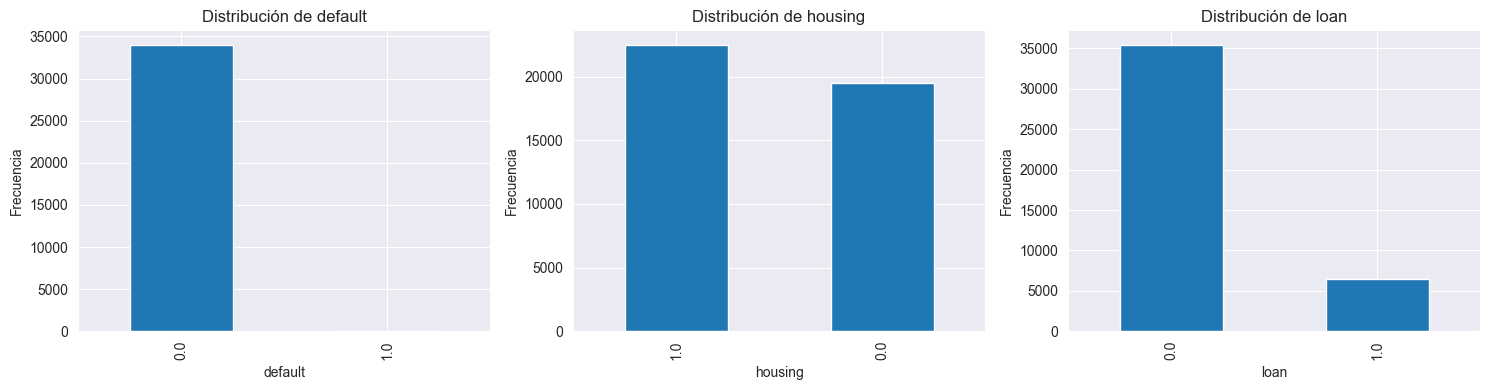

In [148]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(loan_cols):
    data[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### 5.5 Variables de campaña

#### 5.5.1 Duración de llamada

In [149]:
data['duration'].describe()

count    43000.000000
mean       257.739279
std        258.666033
min          0.000000
25%        102.000000
50%        179.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

<Figure size 1000x500 with 0 Axes>

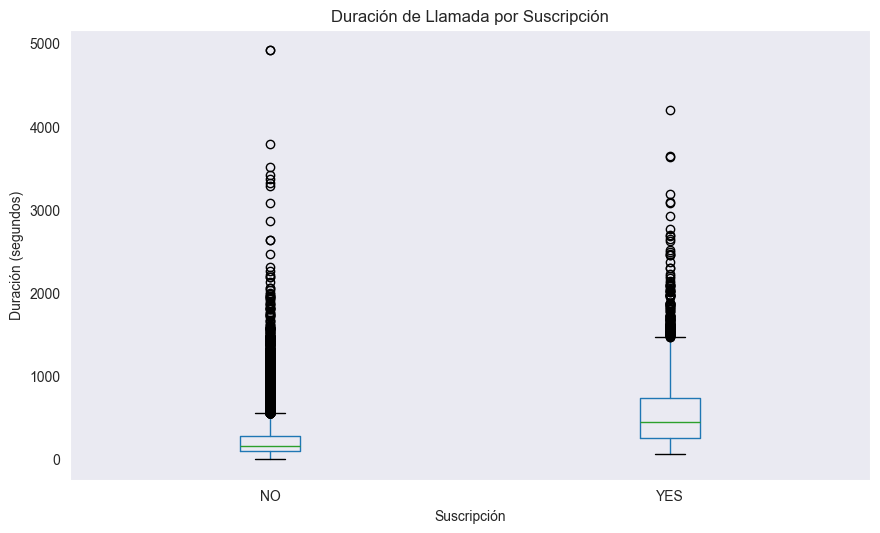

In [150]:
plt.figure(figsize=(10, 5))
data.boxplot(column='duration', by='y', grid=False)
plt.title('Duración de Llamada por Suscripción')
plt.suptitle('')
plt.xlabel('Suscripción')
plt.ylabel('Duración (segundos)')
plt.show()

In [151]:
data.groupby('y')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
NO,38156.0,220.430208,207.121495,0.0,95.0,163.0,278.0,4918.0
YES,4844.0,551.621387,398.398264,63.0,253.0,449.0,740.0,4199.0


#### 5.5.2 Número de contactos

In [152]:
data['campaign'].value_counts().head(10)

campaign
1     18404
2     11048
3      5584
4      2777
5      1658
6      1025
7       658
8       418
9       289
10      236
Name: count, dtype: int64

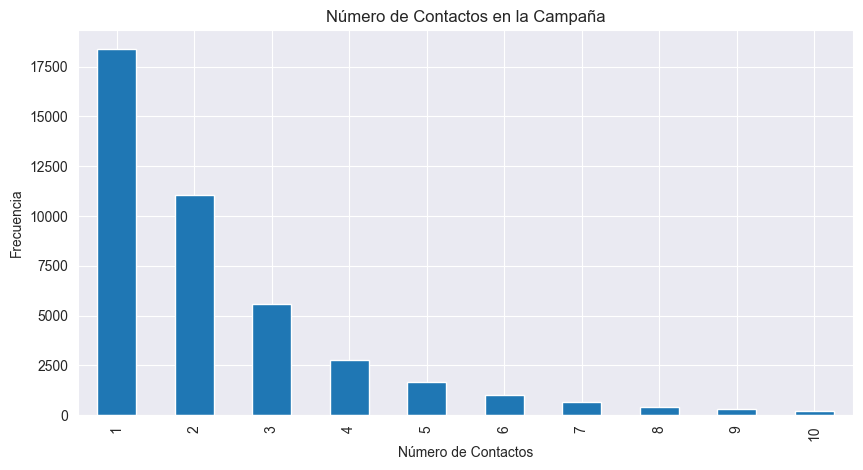

In [153]:
plt.figure(figsize=(10, 5))
data[data['campaign'] <= 10]['campaign'].value_counts().sort_index().plot(kind='bar')
plt.title('Número de Contactos en la Campaña')
plt.xlabel('Número de Contactos')
plt.ylabel('Frecuencia')
plt.show()

#### 5.5.3 Método de contacto

In [154]:
data['contact'].value_counts()

contact
CELLULAR     27396
TELEPHONE    15604
Name: count, dtype: int64

In [155]:
contact_success = pd.crosstab(data['contact'], data['y'], normalize='index') * 100
contact_success

y,NO,YES
contact,,
CELLULAR,85.256972,14.743028
TELEPHONE,94.841066,5.158934


<Figure size 800x500 with 0 Axes>

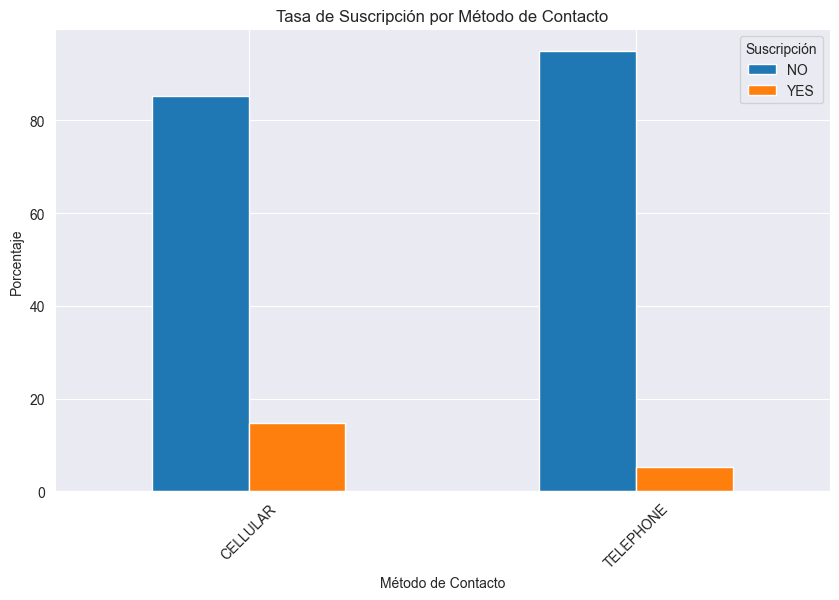

In [156]:
plt.figure(figsize=(8, 5))
contact_success.plot(kind='bar')
plt.title('Tasa de Suscripción por Método de Contacto')
plt.xlabel('Método de Contacto')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.legend(title='Suscripción')
plt.show()

#### 5.5.4 Resultado de campaña anterior

In [157]:
data['poutcome'].value_counts()

poutcome
NONEXISTENT    37103
FAILURE         4461
SUCCESS         1436
Name: count, dtype: int64

In [158]:
poutcome_success = pd.crosstab(data['poutcome'], data['y'], normalize='index') * 100
poutcome_success

y,NO,YES
poutcome,,
FAILURE,85.765523,14.234477
NONEXISTENT,91.184001,8.815999
SUCCESS,34.679666,65.320334


### 5.6 Análisis temporal

#### 5.6.1 Campañas por año

In [159]:
data['year'].value_counts().sort_index()

year
2015.0    8544
2016.0    8533
2017.0    8562
2018.0    8549
2019.0    8564
Name: count, dtype: int64

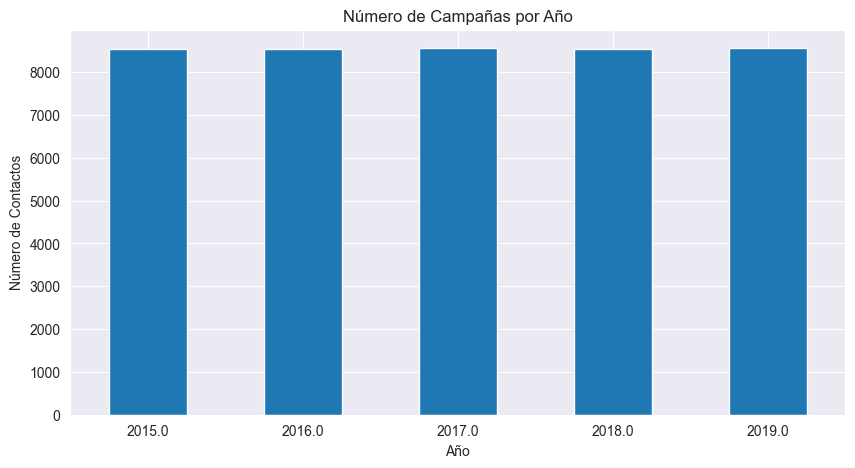

In [160]:
plt.figure(figsize=(10, 5))
data['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Número de Campañas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Contactos')
plt.xticks(rotation=0)
plt.show()

#### 5.6.2 Campañas por mes

In [161]:
month_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
monthly_campaigns = data['month'].value_counts().sort_index()
monthly_campaigns

month
1.0     3517
2.0     3577
3.0     3589
4.0     3582
5.0     3547
6.0     3538
7.0     3593
8.0     3526
9.0     3569
10.0    3599
11.0    3603
12.0    3512
Name: count, dtype: int64

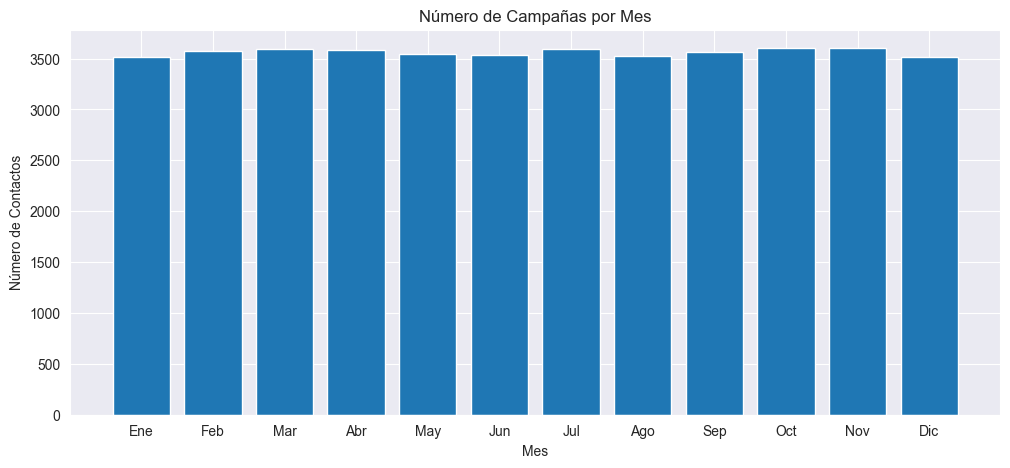

In [162]:
plt.figure(figsize=(12, 5))
plt.bar(range(1, 13), [monthly_campaigns.get(i, 0) for i in range(1, 13)])
plt.xticks(range(1, 13), month_names)
plt.title('Número de Campañas por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Contactos')
plt.show()

#### 5.6.3 Tasa de éxito por mes

In [163]:
monthly_success = data.groupby('month')['y'].apply(lambda x: (x == 'YES').sum() / len(x) * 100).sort_index()
monthly_success

month
1.0     11.600796
2.0     11.126642
3.0     10.727222
4.0     11.194863
5.0     10.628700
6.0     11.334087
7.0     11.411077
8.0     11.457742
9.0     10.254973
10.0    12.364546
11.0    11.490425
12.0    11.446469
Name: y, dtype: float64

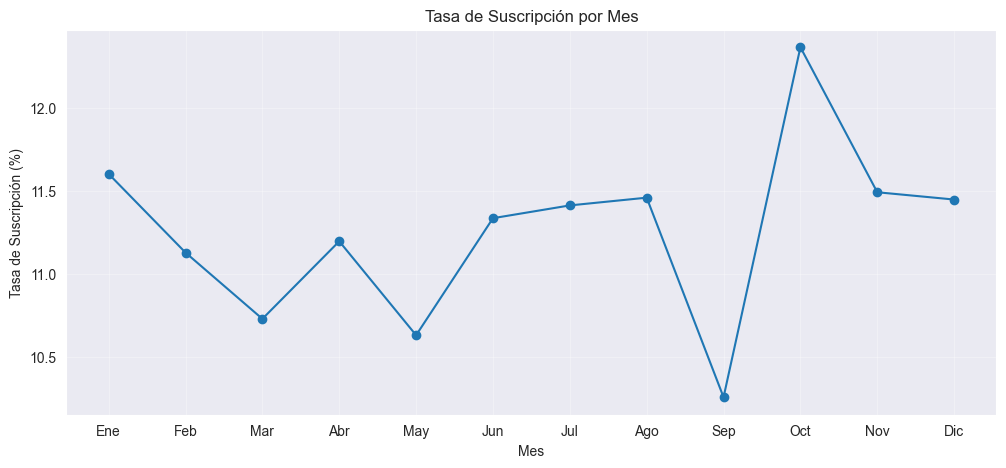

In [164]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, 13), [monthly_success.get(i, 0) for i in range(1, 13)], marker='o')
plt.xticks(range(1, 13), month_names)
plt.title('Tasa de Suscripción por Mes')
plt.xlabel('Mes')
plt.ylabel('Tasa de Suscripción (%)')
plt.grid(True, alpha=0.3)
plt.show()

### 5.7 Indicadores económicos

#### 5.7.1 Estadísticas descriptivas

In [165]:
economic_vars = ['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m']
data[economic_vars].describe()

,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m
count,43000.000000,42529.000000,43000.000000,33744.000000
mean,0.077128,93.574219,-40.509049,3.616521
std,1.573898,0.579548,4.637186,1.737117
min,-3.400000,92.201000,-50.800000,0.634000
25%,-1.800000,93.075000,-42.700000,1.344000
50%,1.100000,93.749000,-41.800000,4.857000
75%,1.400000,93.994000,-36.400000,4.961000
max,1.400000,94.767000,-26.900000,5.045000


#### 5.7.2 Distribuciones

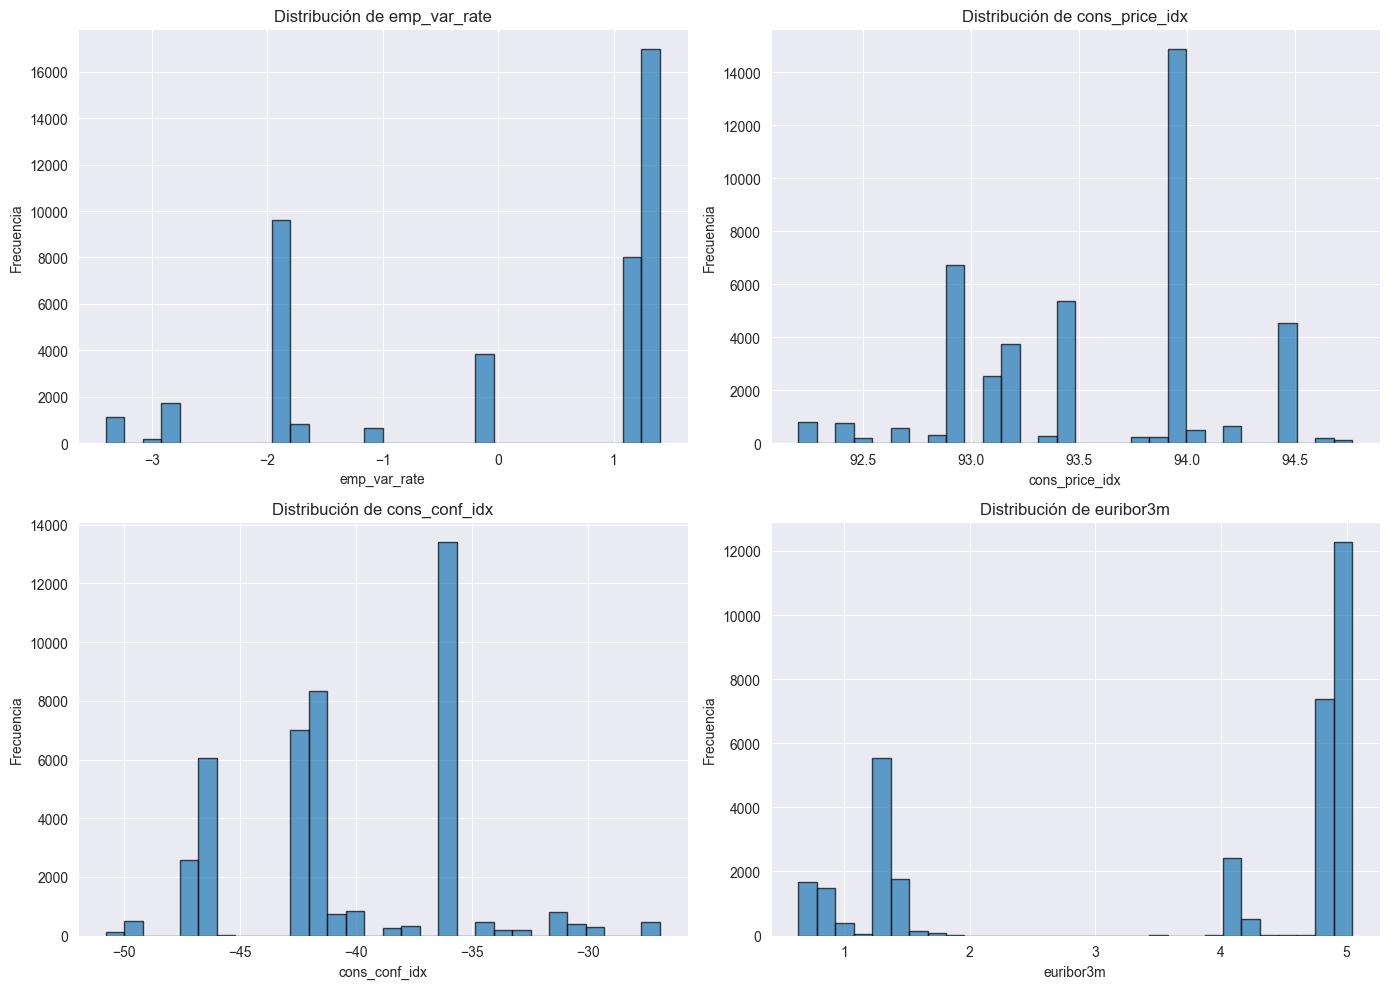

In [166]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(economic_vars):
    axes[i].hist(data[var].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### 5.8 Matriz de correlación
**Por qué:** Identificar relaciones lineales entre variables numéricas

In [167]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_cols].corr()

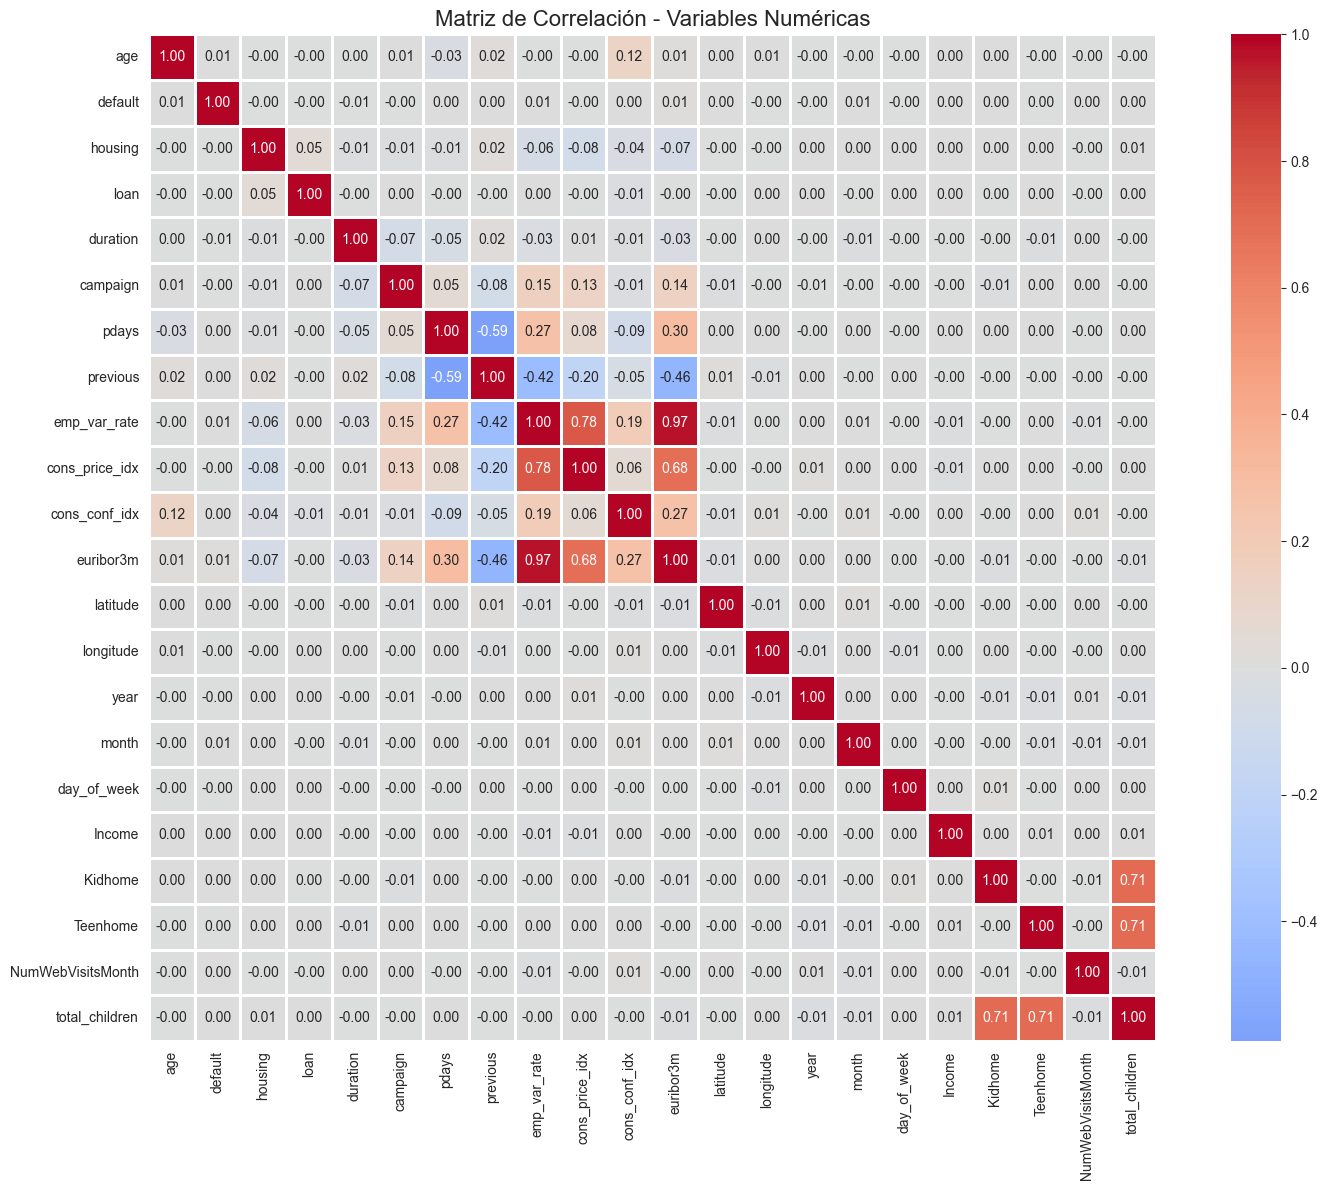

In [168]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1)
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

### 5.9 Correlaciones más altas

In [169]:
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'var1': correlation_matrix.columns[i],
            'var2': correlation_matrix.columns[j],
            'correlation': correlation_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs)
corr_df = corr_df.sort_values('correlation', ascending=False)
corr_df.head(10)

,var1,var2,correlation
142,emp_var_rate,euribor3m,0.972361
140,emp_var_rate,cons_price_idx,0.775699
229,Teenhome,total_children,0.706659
227,Kidhome,total_children,0.706598
154,cons_price_idx,euribor3m,0.684790
115,pdays,euribor3m,0.302078
165,cons_conf_idx,euribor3m,0.273606
112,pdays,emp_var_rate,0.270689
141,emp_var_rate,cons_conf_idx,0.192004
97,campaign,emp_var_rate,0.152084


# 6. Conclusiones Preliminares

Basado en el análisis exploratorio:

### 6.1 Variable objetivo
- Dataset desbalanceado (~11% suscripciones)
- Necesario considerar esto en análisis predictivo

### 6.2 Factores clave identificados
- Duración de llamada correlaciona con éxito
- Método de contacto influye en tasa de suscripción
- Resultado de campaña anterior es predictor importante
- Patrones temporales presentes (mes, año)

### 6.3 Calidad de datos
- Valores faltantes manejados apropiadamente
- Sin duplicados
- Fusión exitosa de datasets (100% match)